## Imports

In [877]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords



## Reading in Data 
Including some basic exploration 

In [878]:
df = pd.read_csv('../datasets/subs.csv', encoding='utf-8')

In [879]:
df.head()

,title,self_text,subreddit
0,Looking for Costa Rican Spanish speakers for a...,Hey guys! I'm a linguistics PhD student and I'...,costarica
1,Traveling to CR as a tica...,Hi! I am Costa Rican-American but have never b...,costarica
2,Puerto Viejo,"Sunset pic on the Caribbean coast, thanks to s...",costarica
3,Bought a bed. They made it right in front of me!,Nice craftsmanship and impressed they built an...,costarica
4,How can I give back to Costa Rica?,"Hi, if I move to Costa Rica part time as an Am...",costarica


In [880]:
df.shape

(3408, 3)

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      3408 non-null   object
 1   self_text  3408 non-null   object
 2   subreddit  3408 non-null   object
dtypes: object(3)
memory usage: 80.0+ KB


In [882]:
df.duplicated().sum()

0

In [883]:
df.isnull().sum()

title        0
self_text    0
subreddit    0
dtype: int64

In [884]:
df['subreddit'].describe()

count                3408
unique                  2
top       CostaRicaTravel
freq                 1970
Name: subreddit, dtype: object

In [885]:
df['subreddit'].value_counts()

CostaRicaTravel    1970
costarica          1438
Name: subreddit, dtype: int64

## Making Subreddit a binary with the tourist as 1 and tico as 0 

In [886]:
df['subreddit'] = df['subreddit'].map({'costarica' : 0, 'CostaRicaTravel' : 1})


## Base

In [887]:
df['subreddit'].value_counts(normalize=True)

1    0.578052
0    0.421948
Name: subreddit, dtype: float64

## Post Lengths 
I would like to know the general length of these posts.   

In [888]:
df['text_words'] = [len(str(n).split()) for n in df['self_text']]

In [889]:
df.head()

,title,self_text,subreddit,text_words
0,Looking for Costa Rican Spanish speakers for a...,Hey guys! I'm a linguistics PhD student and I'...,0,123
1,Traveling to CR as a tica...,Hi! I am Costa Rican-American but have never b...,0,167
2,Puerto Viejo,"Sunset pic on the Caribbean coast, thanks to s...",0,11
3,Bought a bed. They made it right in front of me!,Nice craftsmanship and impressed they built an...,0,26
4,How can I give back to Costa Rica?,"Hi, if I move to Costa Rica part time as an Am...",0,36


In [890]:
df['text_words'].sort_values()

886        1
3278       1
1326       1
1153       1
1353       1
        ... 
3157    2525
3125    2732
353     2950
2982    3030
3076    3163
Name: text_words, Length: 3408, dtype: int64

In [891]:
df['text_words'].describe()

count    3408.000000
mean      106.779636
std       194.808629
min         1.000000
25%        35.000000
50%        62.000000
75%       109.000000
max      3163.000000
Name: text_words, dtype: float64

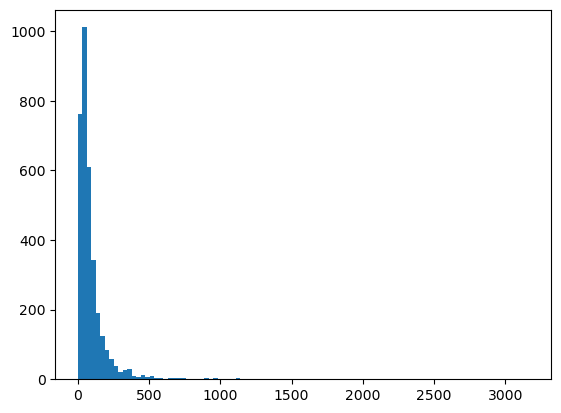

In [892]:
plt.hist(df['text_words'], bins =100);

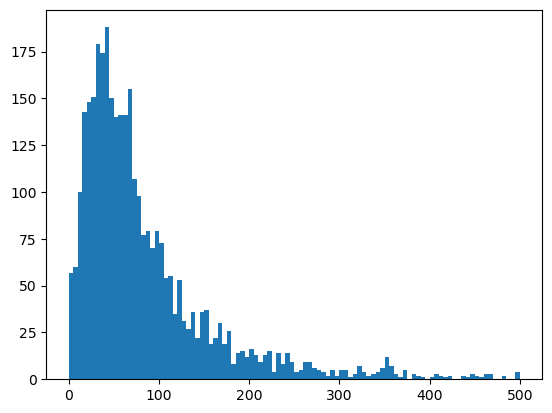

In [893]:
plt.hist(df['text_words'], bins =100, range = (0, 500));

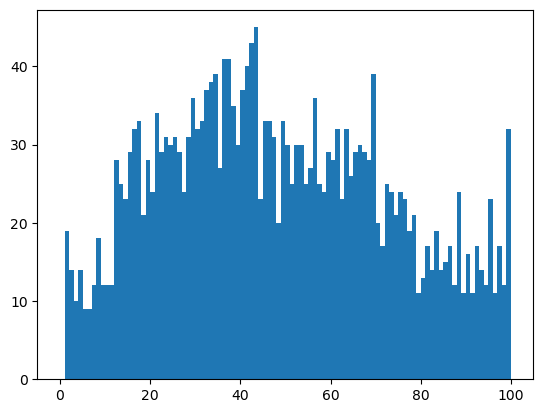

In [894]:
plt.hist(df['text_words'], bins =100, range = (0, 100));

There are very few posts over 500 with some as large as 3000 words plus.  the majority of the posts are under ~100 but over ~35.  There are some around 0 or 1.  This dateset is mostly text, but there are some pictures, and those sort posts may be associated with pictures, or just people not say a lot like "Beaches?".  

The longer text are outliers, but should help the model to better fit as more data is better.  As this is NL there are limited ways to decrease them and I will keep them as is.  

## Combine common words 
combining costa-rica, la-fortuna, and san-jose as they are common compound names

In [895]:
df['self_text']=df['self_text'].str.lower()

In [896]:
df['self_text'] = df['self_text'].str.replace('costa rica', 'costa_rica')
df['self_text'] = df['self_text'].str.replace('la fortuna', 'la_fortuna')
df['self_text'] = df['self_text'].str.replace('san jose', 'san_jose')

## Adding words to the drop words
Adding common words to the drop list and exporting for potential future use.   

In [897]:
stopwords = stopwords.words('english')

In [898]:
stopwords_new = ['thanks', 'good', 'know', 'want', 'time', 'just', 'like', 'day', 've', 'wa', 'don', 'de', 'thanks', 'que', 'hi', 'hey', 'anyone', 'us', 'get', 'also', 'https', 'ha', 'le', 'un', 'el', 'la', 'en', 'es']
stopwords_custom = stopwords +stopwords_new


In [899]:
stop_words_df = pd.DataFrame({'custom_stopwords': stopwords_new})
stop_words_df.to_csv('../datasets/custom_stopwords.csv')

## Vectoring EDA - for full list 
vectoring to see the most common words after removing stop words.  

In [900]:
X=df['self_text']
cvec = CountVectorizer(stop_words=stopwords_custom)
X_fit = cvec.fit_transform(X)
X_df = pd.DataFrame(X_fit.todense(), columns=cvec.get_feature_names_out())

In [901]:
X_df.shape

(3408, 16371)

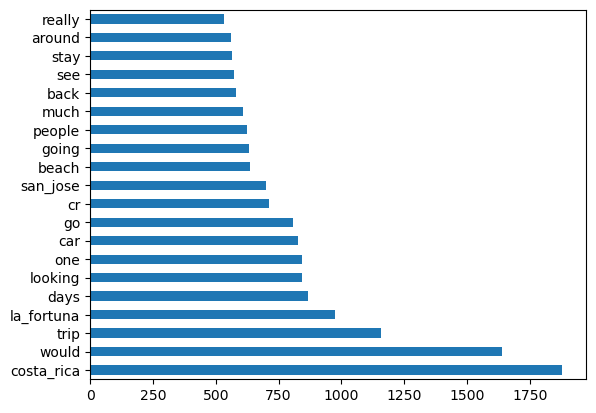

In [902]:
X_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh');

## Looking at Subreddit Specifics

In [903]:
df_tico = df[df['subreddit'] == 0]
df_tour = df[df['subreddit'] ==1]

In [904]:
#applying the same dummifyling and adding of word lenght as i did for the combined data set
#dummification 
df_tico['subreddit'] = df_tico['subreddit'].map({'costarica' : 0, 'CostaRicaTravel' : 1})
df_tour['subreddit'] = df_tour['subreddit'].map({'costarica' : 0, 'CostaRicaTravel' : 1})
#text_words 
df_tico['text_words'] = [len(str(n).split()) for n in df_tico['self_text']]
df_tour['text_words'] = [len(str(n).split()) for n in df_tour['self_text']]

C:\Users\seefe\AppData\Local\Temp\ipykernel_20600\857646345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tico['subreddit'] = df_tico['subreddit'].map({'costarica' : 0, 'CostaRicaTravel' : 1})
C:\Users\seefe\AppData\Local\Temp\ipykernel_20600\857646345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tour['subreddit'] = df_tour['subreddit'].map({'costarica' : 0, 'CostaRicaTravel' : 1})
C:\Users\seefe\AppData\Local\Temp\ipykernel_20600\857646345.py:6: SettingWithCopyWarning: 
A value is trying

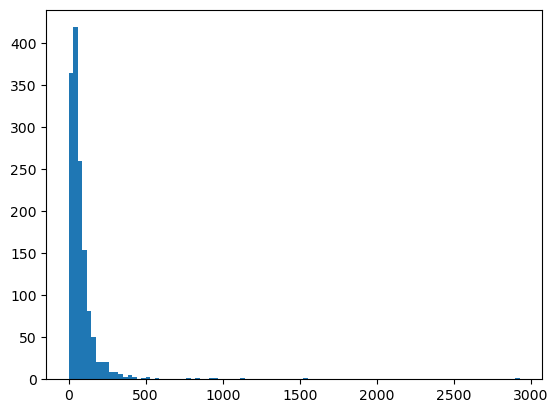

In [905]:
#looking at length differences 
plt.hist(df_tico['text_words'], bins =100);

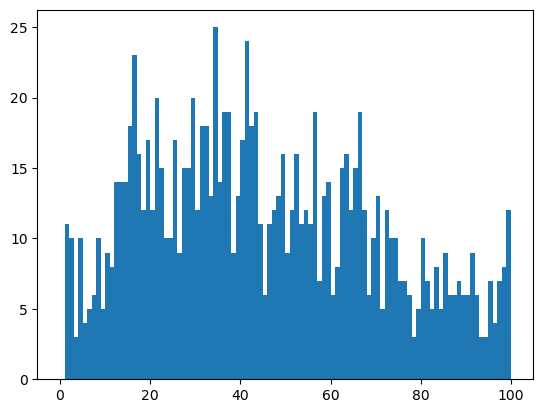

In [906]:
#looking at length differences 
plt.hist(df_tico['text_words'], bins =100, range = (0, 100));

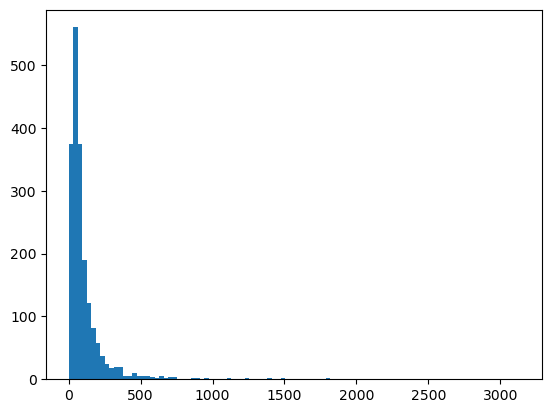

In [907]:
#looking at length differences
plt.hist(df_tour['text_words'], bins =100);

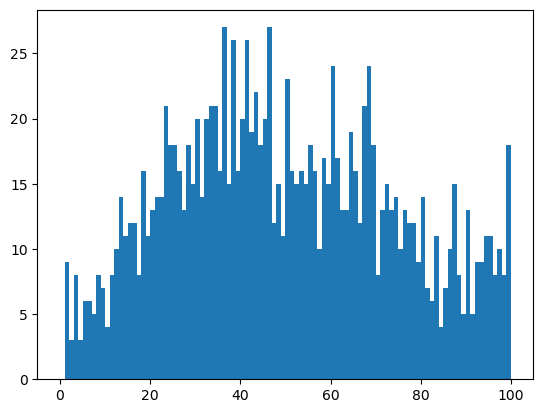

In [908]:
#looking at length differences
plt.hist(df_tour['text_words'], bins =100, range = (0, 100));

There are some visual differences in the pattern of post length.  notably the tourist post lengths are (very roughly) more normal than the tico post lengths.  However there is no direct indicator that will help find one specific post over the other 

## Vectoring EDA - for Tico 
vectoring to see the most common words after removing stop words.  

In [910]:
X=df_tico['self_text']
cvec = CountVectorizer(stop_words=stopwords_custom)
X_fit = cvec.fit_transform(X)
X_df_tico = pd.DataFrame(X_fit.todense(), columns=cvec.get_feature_names_out())

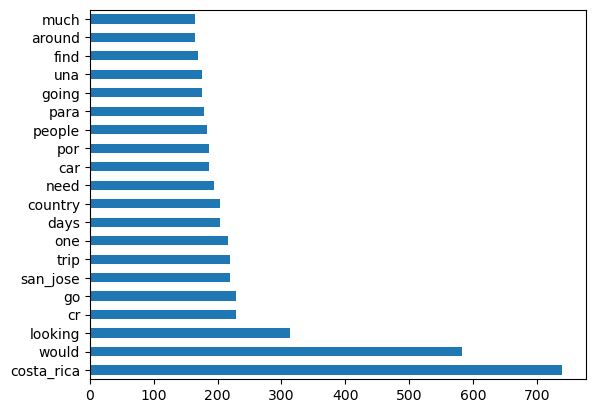

In [911]:
X_df_tico.sum().sort_values(ascending = False).head(20).plot(kind = 'barh');

Same thing without stop words 

In [913]:
X=df_tico['self_text']
cvec = CountVectorizer(stop_words='english')
X_fit = cvec.fit_transform(X)
X_df_tico = pd.DataFrame(X_fit.todense(), columns=cvec.get_feature_names_out())

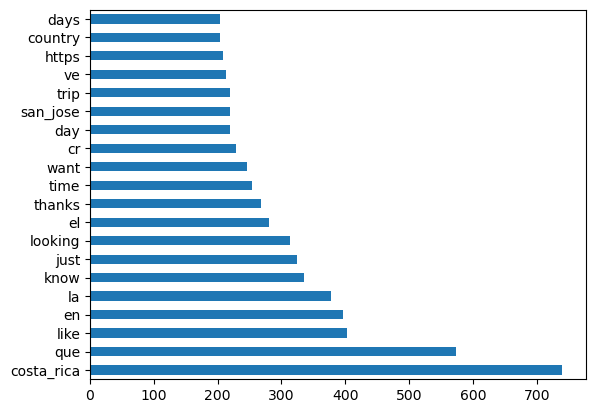

In [914]:
X_df_tico.sum().sort_values(ascending = False).head(20).plot(kind = 'barh');

## Vectoring EDA - for Tourist
vectoring to see the most common words after removing stop words.  

In [915]:
X=df_tour['self_text']
cvec = CountVectorizer(stop_words=stopwords_custom)
X_fit = cvec.fit_transform(X)
X_df_tour = pd.DataFrame(X_fit.todense(), columns=cvec.get_feature_names_out())

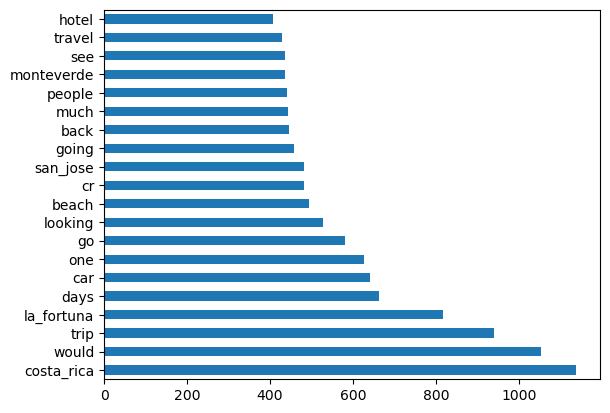

In [916]:
X_df_tour.sum().sort_values(ascending = False).head(20).plot(kind = 'barh');

Same graph as above without custom stop words 

In [918]:
X=df_tour['self_text']
cvec = CountVectorizer(stop_words='english')
X_fit = cvec.fit_transform(X)
X_df_tour = pd.DataFrame(X_fit.todense(), columns=cvec.get_feature_names_out())

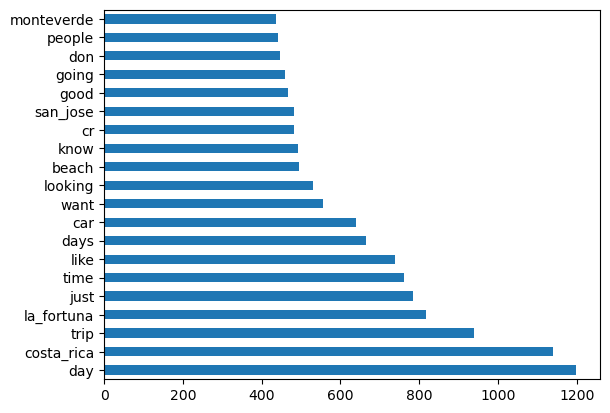

In [919]:
X_df_tour.sum().sort_values(ascending = False).head(20).plot(kind = 'barh');

In [920]:
# there is some varriation in the words used for each class.  Tourists are likely to use action verbs lik going, looking, want(ing) vs ticos.  there are some other variations that may make it easy for the models to fit, but it is still similar enough that it may be difficult.  

## Final Cleaning and Exporting 


In [921]:
df.to_csv('../datasets/subs2.csv', index=False, encoding='utf-8')